# Load and process data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import json

# text process
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer, RegexpStemmer

In [2]:
in_path = r'C:\Users\User\Desktop\Instagram\data'

In [3]:
with open(in_path + '/huangshan.json', 'r', encoding='utf-8') as f:
    data = json.loads(f.read())

In [4]:
df = pd.DataFrame(data)
df.head()

,comments_disabled,dimensions,display_url,edge_liked_by,edge_media_preview_like,edge_media_to_caption,edge_media_to_comment,id,is_video,location,owner,shortcode,tags,taken_at_timestamp,thumbnail_resources,thumbnail_src,urls,video_view_count
0,NaN,"{'height': 1080, 'width': 1080}",https://scontent-atl3-1.cdninstagram.com/vp/02...,{'count': 31},{'count': 31},{'edges': [{'node': {'text': 'Breathtaking vie...,{'count': 2},1768635695000550746,False,"{'has_public_page': True, 'id': '236999748', '...",{'id': '49135036'},BiLdMtBlX1a,"[HuangShan, cablecar]",1525057826,"[{'config_height': 150, 'config_width': 150, '...",https://scontent-atl3-1.cdninstagram.com/vp/b8...,[https://scontent-atl3-1.cdninstagram.com/vp/0...,NaN
1,NaN,"{'height': 706, 'width': 1080}",https://scontent-atl3-1.cdninstagram.com/vp/31...,{'count': 105},{'count': 105},{'edges': [{'node': {'text': 'I’m grateful for...,{'count': 4},1779027164797484376,False,"{'has_public_page': True, 'id': '236999748', '...",{'id': '184152999'},BiwX8fbhj1Y,[],1526296586,"[{'config_height': 150, 'config_width': 150, '...",https://scontent-atl3-1.cdninstagram.com/vp/b2...,[https://scontent-atl3-1.cdninstagram.com/vp/3...,NaN
2,NaN,"{'height': 1350, 'width': 1080}",https://scontent-atl3-1.cdninstagram.com/vp/e8...,{'count': 902},{'count': 902},{'edges': [{'node': {'text': '徽州古城 Wandering a...,{'count': 333},1751782291691387418,False,"{'has_public_page': True, 'id': '361110201', '...",{'id': '5064849724'},BhPlLaEFboa,"[girlsthatwander, shotzdelight, asia_vacations...",1523048744,"[{'config_height': 150, 'config_width': 150, '...",https://scontent-atl3-1.cdninstagram.com/vp/b8...,[https://scontent-atl3-1.cdninstagram.com/vp/e...,NaN
3,NaN,"{'height': 1083, 'width': 1080}",https://scontent-atl3-1.cdninstagram.com/vp/cc...,{'count': 35},{'count': 35},{'edges': [{'node': {'text': '#huangshan #moun...,{'count': 5},1763494337332593967,False,None,{'id': '314391040'},Bh5MMGkH0Uv,"[free, mountains, hiking, huangshan, fresh]",1524444928,"[{'config_height': 150, 'config_width': 150, '...",https://scontent-atl3-1.cdninstagram.com/vp/bb...,[https://scontent-atl3-1.cdninstagram.com/vp/c...,NaN
4,NaN,"{'height': 1349, 'width': 1080}",https://scontent-atl3-1.cdninstagram.com/vp/7b...,{'count': 124},{'count': 124},{'edges': [{'node': {'text': 'One of my favori...,{'count': 15},1779157559519623087,False,"{'has_public_page': True, 'id': '361110201', '...",{'id': '1525150815'},Biw1l--njev,"[forgetyourownpath, chinahighlights, sonyalpha...",1526312130,"[{'config_height': 150, 'config_width': 150, '...",https://scontent-atl3-1.cdninstagram.com/vp/4f...,[https://scontent-atl3-1.cdninstagram.com/vp/7...,NaN


In [5]:
df['likes'] = df['edge_liked_by'].apply(lambda x:x['count'])
df['comment'] = df['edge_media_to_comment'].apply(lambda x:x['count'])
df['text'] = df['edge_media_to_caption'].apply(lambda x: x['edges'][0]['node']['text'] if len(x['edges']) else '')
df['owner'] = df['owner'].apply(lambda x:x['id'])
df['time'] = pd.to_datetime(df['taken_at_timestamp'],unit='s')

In [7]:
clean_df = df[['id', 'likes', 'comment', 'text', 'owner', 'tags', 'time']]

In [8]:
clean_df.head()

,id,likes,comment,text,owner,tags,time
0,1768635695000550746,31,2,Breathtaking view #HuangShan #cablecar,49135036,"[HuangShan, cablecar]",2018-04-30 03:10:26
1,1779027164797484376,105,4,I’m grateful for the trees and mountains that ...,184152999,[],2018-05-14 11:16:26
2,1751782291691387418,902,333,徽州古城 Wandering around an ancient Chinese garde...,5064849724,"[girlsthatwander, shotzdelight, asia_vacations...",2018-04-06 21:05:44
3,1763494337332593967,35,5,#huangshan #mountains #hiking #free #fresh,314391040,"[free, mountains, hiking, huangshan, fresh]",2018-04-23 00:55:28
4,1779157559519623087,124,15,One of my favorite shots of Huangshan! The tre...,1525150815,"[forgetyourownpath, chinahighlights, sonyalpha...",2018-05-14 15:35:30


In [9]:
len(clean_df)  # number of posts

36981

In [10]:
len(clean_df['id'].unique())  # unique posts

36972

In [11]:
len(clean_df['owner'].unique())   # the users

13013

In [12]:
clean_df['time'] = clean_df['time'] + pd.Timedelta(hours=8)  # change time to china hour

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
# time
clean_df['time'].describe()

count                   36981
unique                  36917
top       2018-03-29 20:42:41
freq                        5
first     2011-01-07 21:00:22
last      2018-05-15 05:34:50
Name: time, dtype: object

In [14]:
clean_df = clean_df[clean_df['text']!='']
len(clean_df)

36790

In [15]:
# remove the speical character from text
def clean(text):
    words = map(lambda word: word.lower(), word_tokenize(text))
    p = re.compile('\w+')   #make sure each word are meaningful
    cleaned_words = list(filter(lambda token: p.match(token), words));
    return " ".join(cleaned_words)
clean_df['clean_text'] = clean_df['text'].apply(clean)

# detect language

In [16]:
from collections import defaultdict
from googletrans import Translator

In [23]:
def detect_lang(row):
    try:
        translator = Translator()
        translation = translator.translate(row['clean_text'])
        row['lang'] = translation.src
        row['trans'] = translation.text
        return row
    except:
        #return ['en', row]
        row['lang'] = 'en'
        row['trans'] = row['clean_text']
        return row

In [25]:
translator = Translator()
translator.translate('徽州古城')

AttributeError: 'NoneType' object has no attribute 'group'

In [24]:
clean_df.iloc[:5,].apply(detect_lang, axis=1)

,id,likes,comment,text,owner,tags,time,clean_text,lang,trans
0,1768635695000550746,31,2,Breathtaking view #HuangShan #cablecar,49135036,"[HuangShan, cablecar]",2018-04-30 11:10:26,breathtaking view huangshan cablecar,en,breathtaking view huangshan cablecar
1,1779027164797484376,105,4,I’m grateful for the trees and mountains that ...,184152999,[],2018-05-14 19:16:26,i m grateful for the trees and mountains that ...,en,i m grateful for the trees and mountains that ...
2,1751782291691387418,902,333,徽州古城 Wandering around an ancient Chinese garde...,5064849724,"[girlsthatwander, shotzdelight, asia_vacations...",2018-04-07 05:05:44,徽州古城 wandering around an ancient chinese garde...,en,徽州古城 wandering around an ancient chinese garde...
3,1763494337332593967,35,5,#huangshan #mountains #hiking #free #fresh,314391040,"[free, mountains, hiking, huangshan, fresh]",2018-04-23 08:55:28,huangshan mountains hiking free fresh,en,huangshan mountains hiking free fresh
4,1779157559519623087,124,15,One of my favorite shots of Huangshan! The tre...,1525150815,"[forgetyourownpath, chinahighlights, sonyalpha...",2018-05-14 23:35:30,one of my favorite shots of huangshan the tree...,en,one of my favorite shots of huangshan the tree...


In [18]:
%time clean_df= clean_df.apply(detect_lang, axis=1)

From cffi callback <function _verify_callback at 0x000000002884E268>:
Traceback (most recent call last):
  File "C:\Users\User\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 201, in wrapper
    @wraps(callback)
KeyboardInterrupt


KeyboardInterrupt: 

In [24]:
clean_df.to_csv('translate.csv',index=False)

In [46]:
clean_df['text'][1]

'I’m grateful for the trees and mountains that inspire me🌲🌚 // Had a truly superb holiday finding refuge in nature. Big thanks to Seb for helping me reach full adventure capacity this weekend'

In [276]:
clean_df['lang'] = lang_result['lang']
clean_df['trans'] = lang_result['trans']

'I’m grateful for the trees and mountains that inspire me🌲🌚 // Had a truly superb holiday finding refuge in nature. Big thanks to Seb for helping me reach full adventure capacity this weekend'

# word frequency of hashtags

In [65]:
tag_df = clean_df.loc[clean_df.apply(lambda row: row['tags'] is not float and len(row['tags'])>0, axis=1)]

In [145]:
len(tag_df)

32890

In [67]:
tag_df.head()

,id,likes,comment,text,owner,tags,time,clean_text,lang,trans
0,1768635695000550746,31,2,Breathtaking view #HuangShan #cablecar,49135036,"[HuangShan, cablecar]",2018-04-30 11:10:26,breathtaking view huangshan cablecar,en,breathtaking view huangshan cable car
2,1751782291691387418,902,333,徽州古城 Wandering around an ancient Chinese garde...,5064849724,"[girlsthatwander, shotzdelight, asia_vacations...",2018-04-07 05:05:44,徽州古城 wandering around an ancient chinese garde...,en,徽州古城 wandering around an ancient chinese garde...
3,1763494337332593967,35,5,#huangshan #mountains #hiking #free #fresh,314391040,"[free, mountains, hiking, huangshan, fresh]",2018-04-23 08:55:28,huangshan mountains hiking free fresh,en,huangshan mountains hiking free fresh
4,1779157559519623087,124,15,One of my favorite shots of Huangshan! The tre...,1525150815,"[forgetyourownpath, chinahighlights, sonyalpha...",2018-05-14 23:35:30,one of my favorite shots of huangshan the tree...,en,one of my favorite shots of huangshan the tree...
5,1669147591197484148,1084,34,And another one of those favorite shots of the...,173683326,"[thecreative, instachina, loves_china, travelo...",2017-12-14 04:45:20,and another one of those favorite shots of the...,en,and another one of those favorite shots of the...


In [81]:
# translate and collect tags
def translate_tag(row):
    translator = Translator()
    try:
        translation = translator.translate(row['tags'])
        tag = ",".join([x.text.lower() for x in translation if x.text.lower() not in ['huangshan']])
        row['tag_trans'] = tag
        return row
    except:
        row['tag_trans'] = ''
        return row

In [82]:
%time tag_df= tag_df.apply(translate_tag, axis=1)

Wall time: 5h 22s


In [84]:
tag_df.to_csv('tag.csv', index=False)

In [131]:
# tokenize the tag 
porter = RegexpStemmer('s$', min=4)
def tag_token(text):
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [porter.stem(word) for word in words if word not in ['sulfuric','acid']] 
    p = re.compile('[a-zA-Z]+')   #make sure each word are meaningful
    cleaned_words = list(filter(lambda token: p.match(token), words));
    return " ".join(cleaned_words)    

In [132]:
tag_df['tag_clean'] = tag_df['tag_trans'].apply(tag_token)

In [133]:
tag_df['tag_clean'].to_csv('rule.csv', index=False)   # rule csv

In [120]:
tag_df['trans'].to_csv('senti.csv', index=False)   #sentiment csv

In [144]:
len(tag_df)

32890

In [87]:
tag_df = tag_df[tag_df['tag_trans']!='']

In [88]:
len(tag_df)

32890

In [135]:
# get the list of hashtags
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '#', '/', '://', '_', 'co'])
hashtags = []
porter = RegexpStemmer('s$', min=4)
for i in tag_df.index:
    words = tag_df['tag_trans'][i].split(',')
    for word in words:
        hashtags.append(porter.stem(word))

In [136]:
len(hashtags)

302091

In [113]:
hashtags = [x for x in hashtags if x != 'sulfuric acid']

In [114]:
len(hashtags)

301427

In [115]:
hashfreq = nltk.FreqDist(hashtags)
mostcommon = hashfreq.most_common(100)
print(mostcommon)

[('china', 24760), ('mountain', 10197), ('travel', 8932), ('anhui', 8700), ('yellow mountain', 5250), ('nature', 4703), ('hiking', 3342), ('landscape', 2952), ('yellowmountain', 2271), ('wanderlust', 1950), ('beautiful', 1840), ('cloud', 1817), ('travelgram', 1697), ('asia', 1595), ('sunrise', 1577), ('trip', 1562), ('instatravel', 1553), ('huangshan mountain', 1545), ('photography', 1541), ('view', 1466), ('adventure', 1418), ('tree', 1394), ('travel photography', 1362), ('instagood', 1306), ('holiday', 1273), ('shanghai', 1194), ('sunset', 1130), ('hongcun', 1127), ('traveling', 1123), ('photooftheday', 1059), ('sky', 1036), ('nofilter', 1022), ('explore', 959), ('chinese', 938), ('scenery', 882), ('fog', 880), ('love', 859), ('travelling', 838), ('climbing', 838), ('amazing', 824), ('hike', 817), ('winter', 813), ('vacation', 794), ('photo', 793), ('tunxi', 784), ('vscocam', 744), ('instadaily', 728), ('travelchina', 709), ('picoftheday', 709), ('tourism', 698), ('snow', 693), ('vil

In [139]:
s = 0
for i in mostcommon:
    s += i[1]
s

142468

In [143]:
for i in mostcommon[:50]:
    print(i[0],i[1])

china 24760
mountain 10197
travel 8932
anhui 8700
yellow mountain 5250
nature 4703
hiking 3342
landscape 2952
yellowmountain 2271
wanderlust 1950
beautiful 1840
cloud 1817
travelgram 1697
asia 1595
sunrise 1577
trip 1562
instatravel 1553
huangshan mountain 1545
photography 1541
view 1466
adventure 1418
tree 1394
travel photography 1362
instagood 1306
holiday 1273
shanghai 1194
sunset 1130
hongcun 1127
traveling 1123
photooftheday 1059
sky 1036
nofilter 1022
explore 959
chinese 938
scenery 882
fog 880
love 859
travelling 838
climbing 838
amazing 824
hike 817
winter 813
vacation 794
photo 793
tunxi 784
vscocam 744
instadaily 728
travelchina 709
picoftheday 709
tourism 698


In [140]:
142468/301427

0.47264511805511783

In [73]:
hashfreq = nltk.FreqDist(hashtags)
mostcommon = hashfreq.most_common(100)
print(mostcommon)

[('china', 20847), ('travel', 11051), ('mountain', 9675), ('yellowmountain', 7422), ('anhui', 7156), ('黄山', 4775), ('natur', 4580), ('hike', 4022), ('landscap', 2667), ('beauti', 2179), ('wanderlust', 1942), ('中国', 1771), ('instatravel', 1763), ('travelgram', 1697), ('cloud', 1664), ('huangshanmountain', 1546), ('asia', 1498), ('photographi', 1487), ('trip', 1456), ('安徽', 1435), ('view', 1434), ('sunris', 1398), ('adventur', 1390), ('travelphotographi', 1350), ('tree', 1320), ('instagood', 1306), ('explor', 1185), ('holiday', 1119), ('photooftheday', 1059), ('nofilt', 1051), ('backpack', 1043), ('shanghai', 1037), ('sunset', 1027), ('黃山', 1025), ('sky', 961), ('hongcun', 898), ('love', 892), ('amaz', 829), ('chines', 828), ('climb', 806), ('sceneri', 798), ('vacat', 780), ('fog', 755), ('vscocam', 741), ('instadaili', 728), ('travelchina', 709), ('picoftheday', 709), ('winter', 699), ('photo', 694), ('황산', 663), ('китай', 649), ('villag', 640), ('architectur', 633), ('snow', 629), ('tu

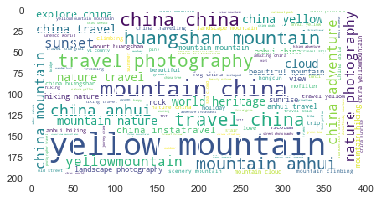

In [118]:
%matplotlib inline

wc = WordCloud(background_color="white", max_words=1000)
wc.generate(" ".join(hashtags))
plt.imshow(wc)

# sentiment analysis

In [146]:
clean_df.head()

,id,likes,comment,text,owner,tags,time,clean_text,lang,trans
0,1768635695000550746,31,2,Breathtaking view #HuangShan #cablecar,49135036,"[HuangShan, cablecar]",2018-04-30 11:10:26,breathtaking view huangshan cablecar,en,breathtaking view huangshan cable car
1,1779027164797484376,105,4,I’m grateful for the trees and mountains that ...,184152999,[],2018-05-14 19:16:26,i m grateful for the trees and mountains that ...,en,i m grateful for the trees and mountains that ...
2,1751782291691387418,902,333,徽州古城 Wandering around an ancient Chinese garde...,5064849724,"[girlsthatwander, shotzdelight, asia_vacations...",2018-04-07 05:05:44,徽州古城 wandering around an ancient chinese garde...,en,徽州古城 wandering around an ancient chinese garde...
3,1763494337332593967,35,5,#huangshan #mountains #hiking #free #fresh,314391040,"[free, mountains, hiking, huangshan, fresh]",2018-04-23 08:55:28,huangshan mountains hiking free fresh,en,huangshan mountains hiking free fresh
4,1779157559519623087,124,15,One of my favorite shots of Huangshan! The tre...,1525150815,"[forgetyourownpath, chinahighlights, sonyalpha...",2018-05-14 23:35:30,one of my favorite shots of huangshan the tree...,en,one of my favorite shots of huangshan the tree...


In [147]:
len(clean_df)

36790

In [148]:
senti_df = clean_df[clean_df['trans']!='']

In [149]:
len(senti_df)

36790

In [151]:
# stop words
stop_words = stopwords.words('english')

def clean(text):
    words = map(lambda word: word.lower(), word_tokenize(text))
    words = [word for word in words if word not in stop_words] 
    p = re.compile('[a-zA-Z]+')   #make sure each word are meaningful
    cleaned_words = list(filter(lambda token: p.match(token), words));
    return " ".join(cleaned_words)

In [152]:
clean_df['clean_trans'] = clean_df['trans'].apply(clean)

In [153]:
text_df = clean_df.loc[clean_df['clean_trans'] != '']

In [154]:
len(text_df)

36674

In [158]:
text_df[['time','clean_trans']].to_csv('senti.csv', encoding='utf-8-sig', index=False)

In [ ]:
# load sentiment analysis result

In [196]:
senti_df = pd.read_csv('senti+results.csv',parse_dates=['time'])

In [197]:
senti_df.head()

,time,clean_trans,Translation,Positive,Negative,EmotionRationale
0,2018-04-30 11:10:00,breathtaking view huangshan cable car,breathtaking view huangshan cable car,1,-1,breathtaking[0] view[0] huangshan[0] cable[0]...
1,2018-05-14 19:16:00,grateful trees mountains inspire me???? truly ...,grateful trees mountains inspire me?<br> truly...,3,-1,grateful[1] trees[0] mountains[0] inspire[2] ...
2,2018-04-07 05:05:00,wandering around ancient chinese garden intere...,wandering around ancient chinese garden intere...,3,-1,wandering[0] around[0] ancient[0] chinese[0] ...
3,2018-04-23 08:55:00,huangshan mountains hiking free fresh,huangshan mountains hiking free fresh,1,-1,huangshan[0] mountains[0] hiking[0] free[0] f...
4,2018-05-14 23:35:00,one favorite shots huangshan trees seem care p...,one favorite shots huangshan trees seem care p...,3,-2,one[0] favorite[1] shots[0] huangshan[0] tree...


In [198]:
senti_df['Positive'] = senti_df['Positive'].apply(lambda x:x-1)
senti_df['Negative'] = senti_df['Negative'].apply(lambda x:x+1)

In [199]:
senti_df.head()

,time,clean_trans,Translation,Positive,Negative,EmotionRationale
0,2018-04-30 11:10:00,breathtaking view huangshan cable car,breathtaking view huangshan cable car,0,0,breathtaking[0] view[0] huangshan[0] cable[0]...
1,2018-05-14 19:16:00,grateful trees mountains inspire me???? truly ...,grateful trees mountains inspire me?<br> truly...,2,0,grateful[1] trees[0] mountains[0] inspire[2] ...
2,2018-04-07 05:05:00,wandering around ancient chinese garden intere...,wandering around ancient chinese garden intere...,2,0,wandering[0] around[0] ancient[0] chinese[0] ...
3,2018-04-23 08:55:00,huangshan mountains hiking free fresh,huangshan mountains hiking free fresh,0,0,huangshan[0] mountains[0] hiking[0] free[0] f...
4,2018-05-14 23:35:00,one favorite shots huangshan trees seem care p...,one favorite shots huangshan trees seem care p...,2,-1,one[0] favorite[1] shots[0] huangshan[0] tree...


In [200]:
senti_df.index = senti_df['time']

In [201]:
daily_summary = pd.DataFrame()
daily_summary['Positive'] = senti_df['Positive'].resample('D').mean()
daily_summary['Negative'] = senti_df['Negative'].resample('D').mean()

In [202]:
daily_summary['Final'] = daily_summary['Positive'] + daily_summary['Negative'] 

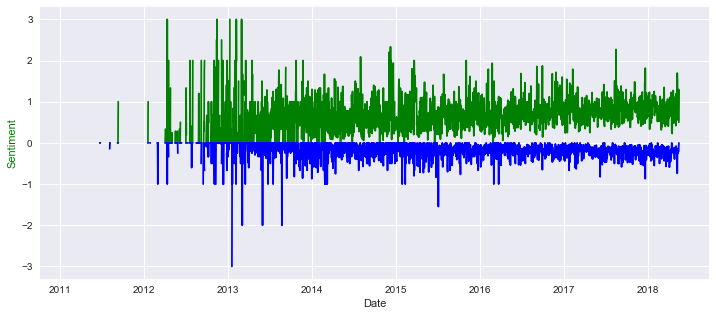

In [203]:
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(daily_summary.index, daily_summary['Positive'], 'g-')
ax1.plot(daily_summary.index, daily_summary['Negative'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
#ax1.set_ylabel('Positive', color='g')
#ax2.set_ylabel('Negative', color='b')

plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [204]:
monthly_summary = pd.DataFrame()
monthly_summary['Positive'] = senti_df['Positive'].resample('M').mean()
monthly_summary['Negative'] = senti_df['Negative'].resample('M').mean()
monthly_summary['Final'] = monthly_summary['Positive'] + monthly_summary['Negative'] 

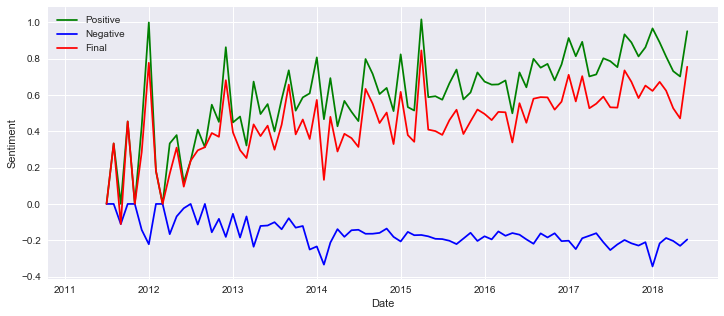

In [207]:
fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()
ax1.plot(monthly_summary.index, monthly_summary['Positive'], 'g-')
ax1.plot(monthly_summary.index, monthly_summary['Negative'], 'b-')
ax1.plot(monthly_summary.index, monthly_summary['Final'], 'r-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
#ax1.set_ylabel('Positive', color='g')
#ax2.set_ylabel('Negative', color='b')
ax1.legend()
plt.show()
plt.rcParams['figure.figsize'] = 12,5

In [208]:
monthly_summary.to_csv('montly_sentiment.csv')